<h1><center>Vehicle Loan Default Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

# 预处理

In [3]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

In [4]:
submission = pd.DataFrame()
submission['UniqueID'] = df1['UniqueID']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [6]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000
mean,535917.57338,54356.99353,75865.06814,74.74653,72.93609,19638.63504,69.02805,3396.88025,7.26224,1549.47715,1.00000,0.84032,0.07558,0.14494,0.02324,0.00213,289.46299,2.44064,1.03990,0.15655,165900.07694,218503.85532,218065.89865,0.05908,0.02770,0.00724,5427.79282,7295.92335,7179.99787,13105.48172,323.26845,0.38183,0.09748,0.20661,0.21707
std,68315.69371,12971.31417,18944.78129,11.45664,69.83499,3491.94957,22.14130,2238.14750,4.48223,975.26128,0.00000,0.36631,0.26432,0.35204,0.15067,0.04607,338.37478,5.21723,1.94150,0.54879,942273.58235,2374794.12577,2377743.84615,0.62679,0.31606,0.11108,170236.99464,183155.99307,182592.50007,151367.90472,15553.69134,0.95511,0.38444,0.70650,0.41225
min,417428.00000,13320.00000,37000.00000,10.03000,1.00000,10524.00000,45.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-6678296.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-574647.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,476786.25000,47145.00000,65717.00000,68.88000,14.00000,16535.00000,48.00000,1511.00000,4.00000,713.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,535978.50000,53803.00000,70946.00000,76.80000,61.00000,20333.00000,86.00000,2970.00000,6.00000,1451.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,595039.75000,60413.00000,79201.75000,83.67000,130.00000,23000.00000,86.00000,5677.00000,10.00000,2362.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,678.00000,3.00000,1.00000,0.00000,35006.50000,62500.00000,60800.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1999.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,671084.00000,990572.00000,1628992.00000,95.00000,261.00000,24803.00000,156.00000,7345.00000,22.00000,3795.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,890.00000,453.00000,144.00000,25.00000,96524920.00000,1000000000.00000,1000000000.00000,52.00000,36.00000,8.00000,36032852.00000,30000000.00000,30000000.00000,25642806.00000,4170901.00000,35.00000,20.00000,36.00000,1.00000


In [7]:
#删除多于变量#
df.drop(['UniqueID','branch_id','supplier_id','Current_pincode_ID',
         'State_ID','Employee_code_ID','MobileNo_Avl_Flag','NO.OF_INQUIRIES',
         'VoterID_flag'],axis=1,inplace=True)
df1.drop(['UniqueID', 'branch_id','supplier_id', 'Current_pincode_ID','State_ID',
          'Employee_code_ID', 'MobileNo_Avl_Flag','NO.OF_INQUIRIES','VoterID_flag'],
         axis=1,inplace=True)

In [8]:
percent_null=df.isnull().sum()/df.shape[0]*100
print(percent_null)

disbursed_amount                      0.00000
asset_cost                            0.00000
ltv                                   0.00000
manufacturer_id                       0.00000
Date.of.Birth                         0.00000
Employment.Type                       3.28581
DisbursalDate                         0.00000
Aadhar_flag                           0.00000
PAN_flag                              0.00000
Driving_flag                          0.00000
Passport_flag                         0.00000
PERFORM_CNS.SCORE                     0.00000
PERFORM_CNS.SCORE.DESCRIPTION         0.00000
PRI.NO.OF.ACCTS                       0.00000
PRI.ACTIVE.ACCTS                      0.00000
PRI.OVERDUE.ACCTS                     0.00000
PRI.CURRENT.BALANCE                   0.00000
PRI.SANCTIONED.AMOUNT                 0.00000
PRI.DISBURSED.AMOUNT                  0.00000
SEC.NO.OF.ACCTS                       0.00000
SEC.ACTIVE.ACCTS                      0.00000
SEC.OVERDUE.ACCTS                 

Employment.Type

In [9]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [10]:
df['Employment.Type'].fillna('Unemployed',inplace=True)
df1['Employment.Type'].fillna('Unemployed',inplace=True)

In [11]:
df['Employment.Type'] = df['Employment.Type'].replace(('Unemployed', 'Salaried', 'Self employed'), (0, 1, 2))
df1['Employment.Type'] = df1['Employment.Type'].replace(('Unemployed', 'Salaried', 'Self employed'), (0, 1, 2))

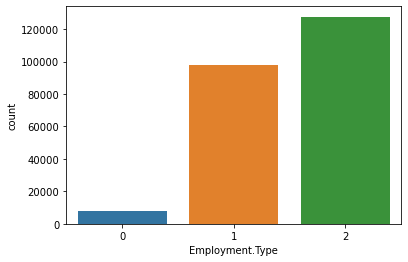

In [12]:
sns.countplot(x=df['Employment.Type'])

PERFORM_CNS.SCORE.DESCRIPTION

In [13]:
#重命名#
df.rename(columns={'PERFORM_CNS.SCORE.DESCRIPTION':'Perform_cns.Score.Description'},inplace=True)
df1.rename(columns={'PERFORM_CNS.SCORE.DESCRIPTION':'Perform_cns.Score.Description'},inplace=True)

In [14]:
#定类改为定序#
df['Perform_cns.Score.Description'] = df['Perform_cns.Score.Description'].replace(('No Bureau History Available', 
                                     'Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer',
                                 'Not Scored: No Activity seen on the customer (Inactive)', 
                                     'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor', 
                                     'Not Scored: More than 50 active Accounts found'),(0, 0, 0, 0, 0, 0, 0))

df['Perform_cns.Score.Description'] = df['Perform_cns.Score.Description'].replace(('L-Very High Risk', 'M-Very High Risk'), (1, 1))

df['Perform_cns.Score.Description'] = df['Perform_cns.Score.Description'].replace(('J-High Risk', 'K-High Risk'), (2, 2))

df['Perform_cns.Score.Description'] = df['Perform_cns.Score.Description'].replace(('H-Medium Risk', 'I-Medium Risk'), (3, 3))

df['Perform_cns.Score.Description'] = df['Perform_cns.Score.Description'].replace(('E-Low Risk', 'F-Low Risk', 'G-Low Risk'), (4, 4, 4))

df['Perform_cns.Score.Description'] = df['Perform_cns.Score.Description'].replace(('A-Very Low Risk', 'B-Very Low Risk',
                                      'C-Very Low Risk', 'D-Very Low Risk'), (5, 5, 5, 5))

In [15]:
df1['Perform_cns.Score.Description'] = df1['Perform_cns.Score.Description'].replace(('No Bureau History Available', 
                                     'Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer',
                                     'Not Scored: No Activity seen on the customer (Inactive)', 
                                     'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor', 
                                     'Not Scored: More than 50 active Accounts found'),(0, 0, 0, 0, 0, 0, 0))

df1['Perform_cns.Score.Description'] = df1['Perform_cns.Score.Description'].replace(('L-Very High Risk', 'M-Very High Risk'), (1, 1))

df1['Perform_cns.Score.Description'] = df1['Perform_cns.Score.Description'].replace(('J-High Risk', 'K-High Risk'), (2, 2))

df1['Perform_cns.Score.Description'] = df1['Perform_cns.Score.Description'].replace(('H-Medium Risk', 'I-Medium Risk'), (3, 3))

df1['Perform_cns.Score.Description'] = df1['Perform_cns.Score.Description'].replace(('E-Low Risk', 'F-Low Risk', 'G-Low Risk'), (4, 4, 4))

df1['Perform_cns.Score.Description'] = df1['Perform_cns.Score.Description'].replace(('A-Very Low Risk', 'B-Very Low Risk',
                                      'C-Very Low Risk', 'D-Very Low Risk'), (5, 5, 5, 5))

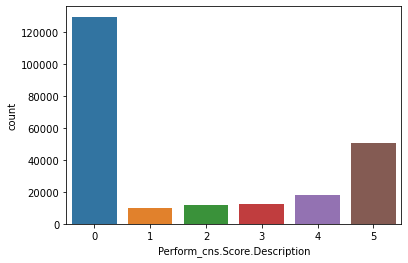

In [16]:
sns.countplot(x = df['Perform_cns.Score.Description'])

日期处理

In [17]:
df[['Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].head()

,Date.of.Birth,DisbursalDate,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-84,03-08-18,0yrs 0mon,0yrs 0mon
1,31-07-85,26-09-18,1yrs 11mon,1yrs 11mon
2,24-08-85,01-08-18,0yrs 0mon,0yrs 0mon
3,30-12-93,26-10-18,0yrs 8mon,1yrs 3mon
4,09-12-77,26-09-18,0yrs 0mon,0yrs 0mon


In [18]:
def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)
df['Age']=df['DisbursalDate']-df['Date.of.Birth']
df.drop(['DisbursalDate','Date.of.Birth'],axis=1,inplace=True)
df1['Date.of.Birth'] = df1['Date.of.Birth'].apply(age)
df1['DisbursalDate'] = df1['DisbursalDate'].apply(age)
df1['Age']=df1['DisbursalDate']-df1['Date.of.Birth']
df1.drop(['DisbursalDate','Date.of.Birth'],axis=1,inplace=True)

df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(change_col_month)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(change_col_month)
df1['AVERAGE.ACCT.AGE'] = df1['AVERAGE.ACCT.AGE'].apply(change_col_month)
df1['CREDIT.HISTORY.LENGTH'] = df1['CREDIT.HISTORY.LENGTH'].apply(change_col_month)

df.rename(columns={'AVERAGE.ACCT.AGE':'Average.Acct.Age'},inplace=True)
df.rename(columns={'CREDIT.HISTORY.LENGTH':'Credit.History.Length'},inplace=True)
df1.rename(columns={'AVERAGE.ACCT.AGE':'Average.Acct.Age'},inplace=True)
df1.rename(columns={'CREDIT.HISTORY.LENGTH':'Credit.History.Length'},inplace=True)

In [19]:
df[['Age','Average.Acct.Age','Credit.History.Length']].head()

,Age,Average.Acct.Age,Credit.History.Length
0,34,0,0
1,33,23,23
2,33,0,0
3,25,8,15
4,41,0,0


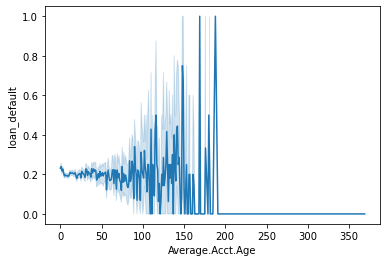

In [20]:
plot = df[df['Average.Acct.Age']<175]
sns.lineplot(x=df['Average.Acct.Age'],y=df['loan_default'])

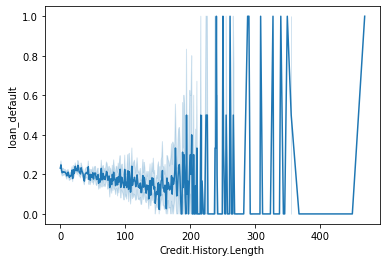

In [21]:
plot = df[df['Credit.History.Length']<200]
sns.lineplot(x=df['Credit.History.Length'],y=df['loan_default'])

# DEA

In [22]:
numerical=['disbursed_amount','asset_cost','ltv','PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','Age','NEW.ACCTS.IN.LAST.SIX.MONTHS', 
        'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','Average.Acct.Age','Credit.History.Length']
categorical=[ 'Aadhar_flag', 'PAN_flag', 'Driving_flag', 'Passport_flag' ,
        'Perform_cns.Score.Description','Employment.Type','manufacturer_id']

统计检验

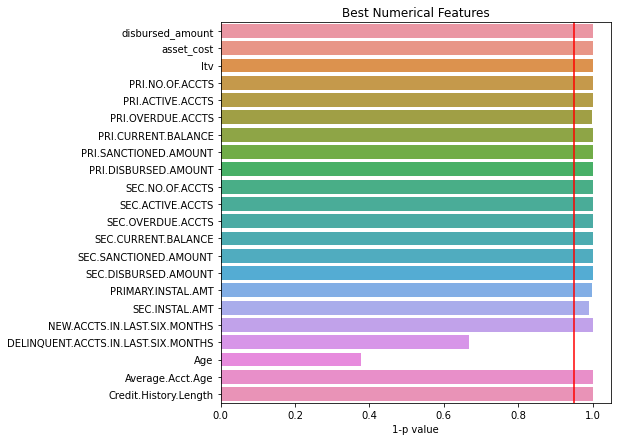

In [23]:
p=[]#t检验数值型变量对目标变量的显著性，越过红线表示显著
from scipy.stats import ttest_ind

for i in numerical:
    df2=df.groupby('loan_default').get_group(0)
    df3=df.groupby('loan_default').get_group(1)
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

In [24]:
for i in numerical:#各变量的标准差，效果不明显；T检验的独立性的假设下，观察样本应该有相等的标准差。
    df2=df.groupby('loan_default').get_group(0)
    df3=df.groupby('loan_default').get_group(1)
    print(np.std(df1[i],ddof=1),np.std(df2[i],ddof=1))

13123.697627449983 13140.699007454747
18271.485420055873 19015.002867400784
11.006380347585612 11.681454560472389
4.559030022320384 5.261141650230395
1.73345150784226 2.00824201211921
0.5318319591723933 0.5320262425891056
889092.5268520322 994631.7352945375
1069342.924568055 1234346.7457193038
1077009.644480313 1240214.8264108973
0.3932369070043328 0.6516570890284885
0.19837446348720028 0.3233747412831527
0.073784035402698 0.11124913670225146
140605.9385213472 184110.75765852304
201551.56042162306 195212.28973438882
201368.64743663304 194597.53945618658
274124.97785967204 157963.98513594718
17638.40745826968 16588.052553484686
0.8434060079121927 0.9729689997391793
0.38180863331448944 0.3702351321845456
9.890495359544838 9.837771953397374
0.8434060079121927 0.9729689997391793
0.38180863331448944 0.3702351321845456
14.989788544402193 15.253439787592614
27.46037871029429 29.3422446151396


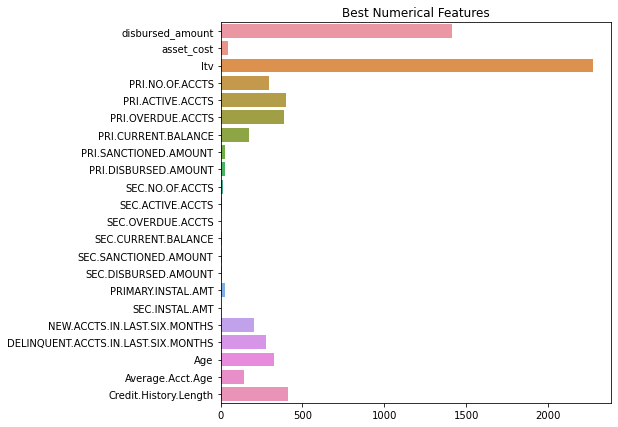

In [25]:
#数值型变量
from sklearn.feature_selection import SelectKBest,f_classif#使用SelectKBest库来缩小特性的选择范围。
n = SelectKBest(score_func=f_classif, k=10)
numcols=n.fit(df[numerical],df['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Best Numerical Features')#图表显示，二级帐户的信息是无关紧要的。所以我们将不得不合并主帐户和二级帐户的信息。
plt.show()

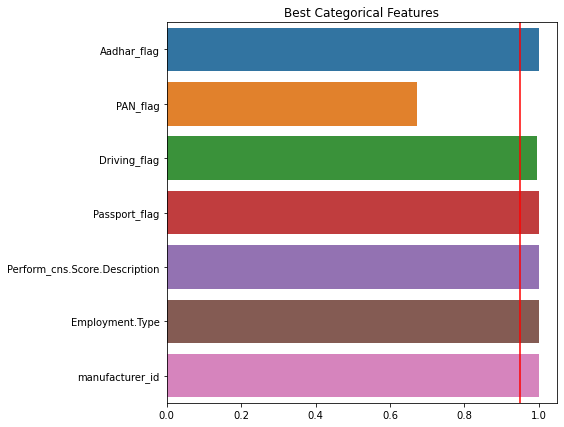

In [26]:
#分类变量
from scipy.stats import chi2_contingency#分类变量的卡方检验
l=[]
for i in categorical:
    pvalue  = chi2_contingency(pd.crosstab(df['loan_default'],df[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=categorical)
plt.title('Best Categorical Features')
plt.axvline(x=(1-0.05),color='r')
plt.show()

合并变量

In [27]:
df.loc[:,'No.of.Accts'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS']
df.loc[:,'Total.Active.Accts']=df['PRI.ACTIVE.ACCTS']+df['SEC.ACTIVE.ACCTS']
df.loc[:,'Total.Overdue.Accts'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS']
df.loc[:,'Total.Current.Balance'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']
df.loc[:,'Total.Sanctioned.Amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']
df.loc[:,'Total.Instal.Amt'] = df['PRIMARY.INSTAL.AMT'] + df['SEC.INSTAL.AMT']
df.loc[:,'Total.Disbursed.Amount'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']

In [28]:
df1.loc[:,'No.of.Accts'] = df1['PRI.NO.OF.ACCTS'] + df1['SEC.NO.OF.ACCTS']
df1.loc[:,'Total.Active.Accts']=df['PRI.ACTIVE.ACCTS']+df['SEC.ACTIVE.ACCTS']
df1.loc[:,'Total.Overdue.Accts'] = df1['PRI.OVERDUE.ACCTS'] + df1['SEC.OVERDUE.ACCTS']
df1.loc[:,'Total.Current.Balance'] = df1['PRI.CURRENT.BALANCE'] + df1['SEC.CURRENT.BALANCE']
df1.loc[:,'Total.Sanctioned.Amount'] = df1['PRI.SANCTIONED.AMOUNT'] + df1['SEC.SANCTIONED.AMOUNT']
df1.loc[:,'Total.Instal.Amt'] = df1['PRIMARY.INSTAL.AMT'] + df1['SEC.INSTAL.AMT']
df1.loc[:,'Total.Disbursed.Amount'] = df1['PRI.DISBURSED.AMOUNT'] + df1['SEC.DISBURSED.AMOUNT']

In [29]:
df=df.drop(['PRI.CURRENT.BALANCE','PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
            'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRI.ACTIVE.ACCTS',
            'PRI.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.OVERDUE.ACCTS',
            'SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',],axis=1)
df1=df1.drop(['PRI.CURRENT.BALANCE','PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
            'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'PRI.ACTIVE.ACCTS',
            'PRI.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.OVERDUE.ACCTS',
            'SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT'],axis=1)

In [30]:
colu=['No.of.Accts','Total.Active.Accts','Total.Overdue.Accts','Total.Current.Balance',
      'Total.Sanctioned.Amount','Total.Instal.Amt','Total.Disbursed.Amount']

In [31]:
df[colu].head()

,No.of.Accts,Total.Active.Accts,Total.Overdue.Accts,Total.Current.Balance,Total.Sanctioned.Amount,Total.Instal.Amt,Total.Disbursed.Amount
0,0,0,0,0,0,0,0
1,1,1,1,27600,50200,1991,50200
2,0,0,0,0,0,0,0
3,3,0,0,0,0,31,0
4,0,0,0,0,0,0,0


Text(0.5, 0, 'Total Disbursed Amount')

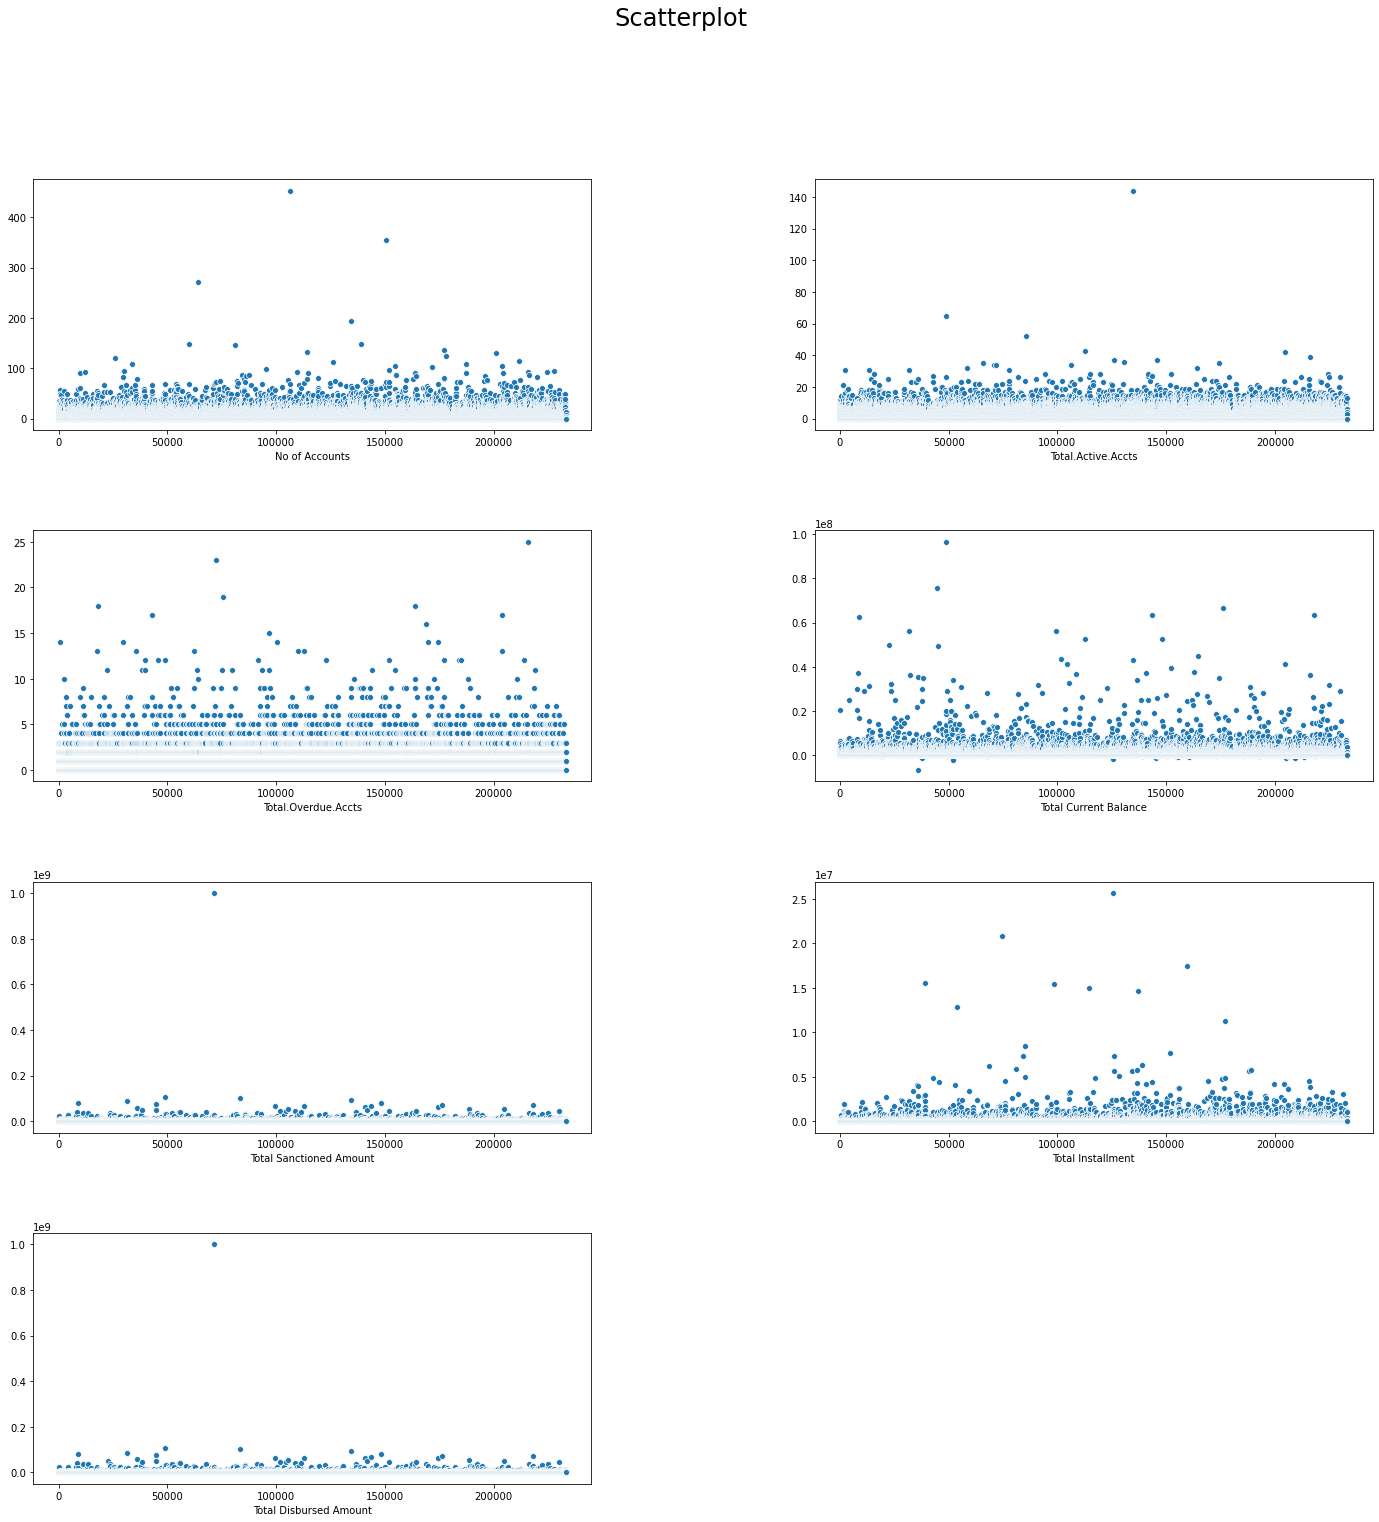

In [33]:
#做散点图
plt.figure(figsize=(24,24))
plt.suptitle("Scatterplot",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(4,2,1)
sns.scatterplot(data=df['No.of.Accts'])
plt.xlabel("No of Accounts")
plt.subplot(4,2,2)
sns.scatterplot(data=df['Total.Active.Accts'])
plt.xlabel("Total.Active.Accts")
plt.subplot(4,2,3)
sns.scatterplot(data=df['Total.Overdue.Accts'])
plt.xlabel('Total.Overdue.Accts')
plt.subplot(4,2,4)
sns.scatterplot(data=df['Total.Current.Balance'])
plt.xlabel('Total Current Balance')
plt.subplot(4,2,5)
sns.scatterplot(data=df['Total.Sanctioned.Amount'])
plt.xlabel('Total Sanctioned Amount')
plt.subplot(4,2,6)
sns.scatterplot(data=df['Total.Instal.Amt'])
plt.xlabel('Total Installment')
plt.subplot(4,2,7)
sns.scatterplot(data=df['Total.Disbursed.Amount'])
plt.xlabel('Total Disbursed Amount')


离群值处理

In [32]:
nums=['disbursed_amount','asset_cost','Total.Current.Balance','Age','PERFORM_CNS.SCORE',
      'Total.Sanctioned.Amount','Total.Instal.Amt','Total.Disbursed.Amount',
      'No.of.Accts','Average.Acct.Age','Credit.History.Length',
      'Total.Active.Accts','Total.Overdue.Accts',
      ]

In [33]:
def train_add_hat(x, features):
    d = x.copy() # 复制表
    q95_dict = {} # 空字典
    for col in features: # 遍历特征列
        q95 = np.percentile(d[col], 95) # 95分位数
        q95_dict[col] = q95 # append至字典
        b = np.array(d[col]) # 转为数组
        c = list(map(lambda x:q95 if x > q95 else x, b)) # map一一处理
        d = d.drop(col, axis=1) # 删除列
        d[col] = c # 新增列
    # 返回处理后的数据表和处理字典
    return d, q95_dict

In [34]:
df,q95=train_add_hat(df,nums)

In [35]:
def add_hat(x, features, q95_dict):
    import numpy as np
    import pandas as pd
    d = x.copy()
    len_d = len(d.index)  # 测试集大小
    for col in features:
        q95 = q95_dict[col]
        b = np.array(d[col])
        c = list(map(lambda x:q95 if x > q95 else x, b))
        d = d.drop(col, axis=1)
        d[col] = c
    return d

In [36]:
df1=add_hat(df1,nums,q95)

In [37]:
df.describe()

,ltv,manufacturer_id,Employment.Type,Aadhar_flag,PAN_flag,Driving_flag,Passport_flag,Perform_cns.Score.Description,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,loan_default,disbursed_amount,asset_cost,Total.Current.Balance,Age,PERFORM_CNS.SCORE,Total.Sanctioned.Amount,Total.Instal.Amt,Total.Disbursed.Amount,No.of.Accts,Average.Acct.Age,Credit.History.Length,Total.Active.Accts,Total.Overdue.Accts
count,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000
mean,74.74653,69.02805,1.51457,0.84032,0.07558,0.02324,0.00213,1.70708,0.38183,0.09748,0.21707,53717.32368,74673.10322,87701.56973,33.93914,289.22483,122678.60781,3166.79401,121772.67517,2.07345,7.94342,14.23069,0.94562,0.11685
std,11.45664,22.14130,0.56170,0.36631,0.26432,0.15067,0.04607,2.12334,0.95511,0.38444,0.41225,10844.14368,14196.79230,212049.60499,9.44136,337.99122,275696.00408,7043.56692,274680.12661,3.17430,11.23379,21.02781,1.44852,0.32124
min,10.03000,45.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,13320.00000,37000.00000,-6678296.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,68.88000,48.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,47145.00000,65717.00000,0.00000,26.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,76.80000,86.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,53803.00000,70946.00000,0.00000,32.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
75%,83.67000,86.00000,2.00000,1.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,60413.00000,79201.75000,37336.00000,41.00000,678.00000,65649.75000,2083.00000,64284.00000,3.00000,13.00000,24.00000,1.00000,0.00000
max,95.00000,156.00000,2.00000,1.00000,1.00000,1.00000,1.00000,5.00000,35.00000,20.00000,1.00000,74122.35000,109680.00000,833200.10000,53.00000,825.00000,1069041.30000,27311.70000,1065028.00000,11.00000,38.00000,72.00000,5.00000,1.00000


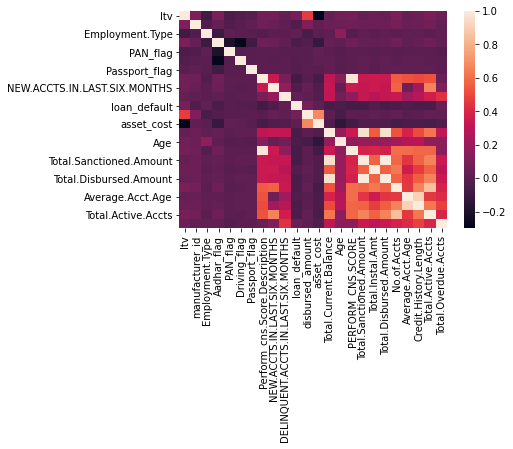

In [38]:
corr=round(df.corr(),2)
sns.heatmap(corr,annot=False)

数据分布

In [39]:
nums=['disbursed_amount','asset_cost','PERFORM_CNS.SCORE','ltv',
      'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
      'Average.Acct.Age','Credit.History.Length', 'No.of.Accts','Total.Active.Accts',
             'Total.Overdue.Accts','Total.Current.Balance', 'Total.Sanctioned.Amount',
             'Total.Instal.Amt','Total.Disbursed.Amount','Age']

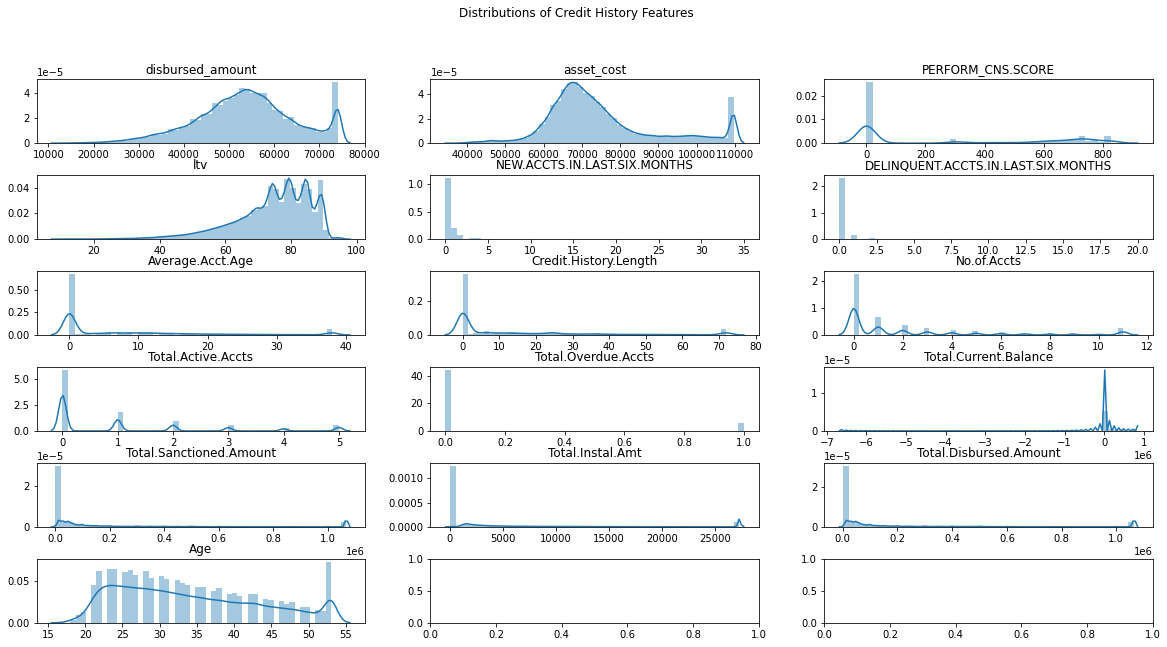

In [40]:
data=df[nums]
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Credit History Features')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

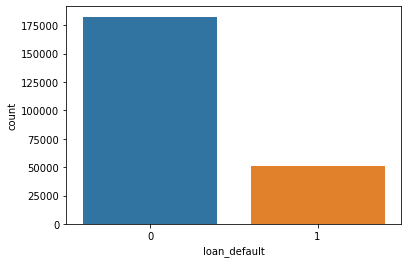

In [41]:
sns.countplot(x=df['loan_default'])

不平衡处理

In [42]:
df2=df.sample(frac=0.09,axis=0,random_state=42)

In [43]:
X=df2.drop("loan_default",axis=1)
y=df2["loan_default"]

In [44]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

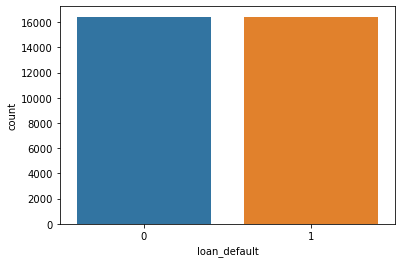

In [45]:
sns.countplot(y)

# 建模

划分训练集合验证集

In [46]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 10)
print(X_train.shape,X_val.shape)

(24634, 23) (8212, 23)


In [47]:
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(X_train, y_train)
    pred = model.predict(X_val)
    prob=model.predict_proba(X_val)
    #Model accuracy
    acc = accuracy_score(y_val, pred)
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_val, pred)*100)
    print('recall_score',recall_score(y_val, pred)*100)
    print('f1_score',f1_score(y_val, pred)*100)
    
    #ROC Score
    roc_score = roc_auc_score(y_val, pred)
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    # Confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_val, pred)))
    
    #ROC Score
    fpr, tpr, threshold = roc_curve(y_val, pred)
    roc_auc = auc(fpr, tpr)
    
    #ROC Plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    #K-S
    skplt.metrics.plot_ks_statistic(y_true=y_val, y_probas=prob)
    plt.show()
    
    #lift
    skplt.metrics.plot_lift_curve(y_true=y, y_probas=prob)
    plt.show()

LightGBM

In [ ]:
lgbm = LGBMClassifier()#调参
def lgbm_cv(n_estimators,
          max_depth,
          num_leaves,
          min_data_in_leaf,
          feature_fraction,
          bagging_fraction,
          min_gain_to_split,
          lambda_l1):
    val = cross_val_score(
        LGBMClassifier(n_estimators=int(n_estimators),
            num_leaves= int(num_leaves),
            min_data_in_leaf=int(min_data_in_leaf), 
            objective='regression',
            max_depth=int(max_depth),
            learning_rate= 0.01,
            boosting= "gbdt",
            feature_fraction= feature_fraction,
            bagging_freq= 1,
            bagging_fraction=bagging_fraction ,
            bagging_seed= 11,
            metric= 'rmse',
            lambda_l1= lambda_l1,
            verbose= -1
        ),
        X_train, y_train, scoring='roc_auc',cv = 2
    ).mean()
    return val
lgbm_bo = BayesianOptimization(
        lgbm_cv,
        {
        'n_estimators': (500, 700),
        'max_depth': (6, 16),
        'num_leaves': (120, 150),
        'min_data_in_leaf': (5, 20),
        'feature_fraction': (0.3, 0.7),
        'bagging_fraction': (0.3, 0.7),
        'lambda_l1': (0, 2),
        'min_gain_to_split': (0, 1)
        })
import warnings
warnings.filterwarnings('ignore')
lgbm_bo.maximize()

In [124]:
print(lgbm_bo.max)

{'target': 0.8966310221626257, 'params': {'bagging_fraction': 0.5572100553334102, 'feature_fraction': 0.46941748569766906, 'lambda_l1': 0.09499540673908924, 'max_depth': 15.163415228106249, 'min_data_in_leaf': 16.762592541718362, 'min_gain_to_split': 0.04456830928147271, 'n_estimators': 659.9911817580323, 'num_leaves': 149.2106066401409}}


LGBMClassifier
[LightGBM] [Warning] feature_fraction is set=0.47, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] min_gain_to_split is set=0.04, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.04
[LightGBM] [Warning] lambda_l1 is set=0.09, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09
[LightGBM] [Warning] bagging_fraction is set=0.56, subsample=1.0 will be ignored. Current value: bagging_fraction=0.56
accuracy_score 0.8490014612761811
precision_score 93.3776837012398
recall_score 75.15210513506936
f1_score 83.27939590075513
roc_auc_score 0.8490727362529729
confusion_matrix
      0     1
0  3884   219
1  1021  3088


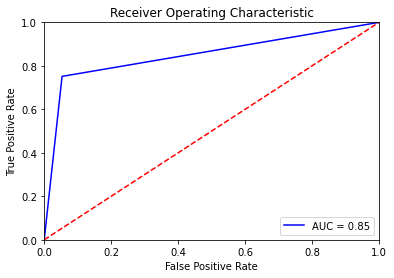

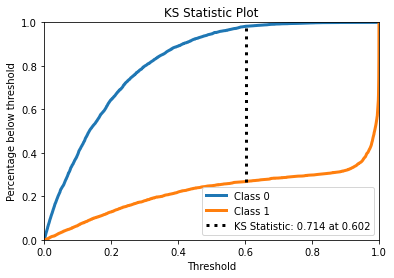

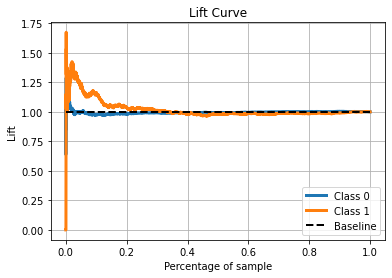

In [48]:
lgbm = LGBMClassifier(n_estimators=660,
          max_depth=15,
          num_leaves=150,
          min_data_in_leaf=17,
          feature_fraction=0.47,
          bagging_fraction=0.56,
          lambda_l1=0.09,
          min_gain_to_split=0.04)
train_model(lgbm, 'LGBMClassifier')

CatBoost

In [145]:
cat = CatBoostClassifier()#调参
def cat_cv(learning_rate,
           iterations,
           depth,
           l2_leaf_reg,
           random_strength,
          colsample_bylevel):
    val = cross_val_score(
        CatBoostClassifier(use_best_model=False,random_state=42,
                           learning_rate=learning_rate,
                          iterations=int(iterations),
                           depth=int(round(depth)),l2_leaf_reg =l2_leaf_reg,
                           early_stopping_rounds=800,verbose = 0
        ),
        X_train, y_train, scoring='roc_auc',cv = 2
    ).mean()
    return val
cat_bo = BayesianOptimization(
        cat_cv,
        {
        'depth':(5,10),
    'l2_leaf_reg':(0.3,0.8),
    'iterations' : (1500,1800),
    'learning_rate':(0.01, 0.05),
    'random_strength':(0.5,1.5),
    'colsample_bylevel':(0.5,1)
        },random_state=1)

cat_bo.maximize()

|   iter    |  target   | colsam... |   depth   | iterat... | l2_lea... | learni... | random... |
-------------------------------------------------------------------------------------------------
|  1        |  0.8937   |  0.7085   |  8.602    |  1.5e+03  |  0.4512   |  0.01587  |  0.5923   |
|  2        |  0.8928   |  0.5931   |  6.728    |  1.619e+0 |  0.5694   |  0.02677  |  1.185    |
|  3        |  0.8944   |  0.6022   |  9.391    |  1.508e+0 |  0.6352   |  0.02669  |  1.059    |
|  4        |  0.8916   |  0.5702   |  5.991    |  1.74e+03 |  0.7841   |  0.02254  |  1.192    |
|  5        |  0.894    |  0.9382   |  9.473    |  1.526e+0 |  0.3195   |  0.01679  |  1.378    |
|  6        |  0.8935   |  0.7561   |  9.694    |  1.509e+0 |  0.6584   |  0.04564  |  0.5273   |
|  7        |  0.889    |  0.7774   |  8.457    |  1.508e+0 |  0.6313   |  0.01     |  1.5      |
|  8        |  0.893    |  0.9761   |  8.684    |  1.5e+03  |  0.4408   |  0.01264  |  0.7765   |
|  9        |  0.891

In [146]:
print(cat_bo.max)

{'target': 0.8951149929127231, 'params': {'colsample_bylevel': 0.5789202512108471, 'depth': 9.731635943410714, 'iterations': 1507.7328163013963, 'l2_leaf_reg': 0.460357007523401, 'learning_rate': 0.023653127261698187, 'random_strength': 0.5690756981830616}}


Cat Boost
accuracy_score 0.8526546517291768
precision_score 95.02951227089159
recall_score 74.44633730834754
f1_score 83.48799126637554
roc_auc_score 0.8527337581966243
confusion_matrix
      0     1
0  3943   160
1  1050  3059


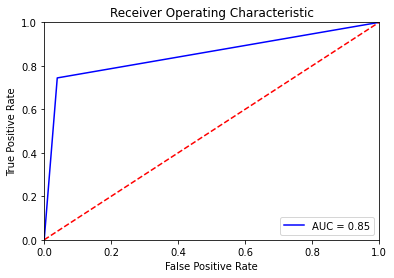

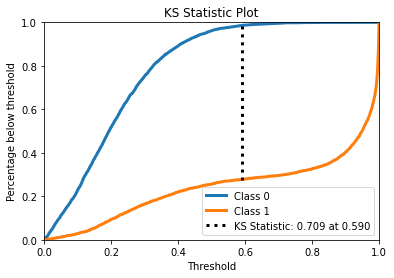

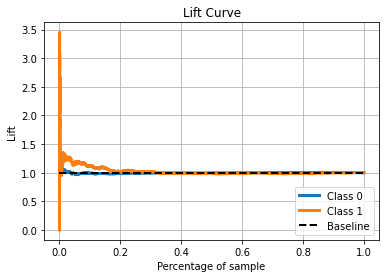

In [49]:
cat = CatBoostClassifier(learning_rate=0.024,iterations=1507,
                         depth=9,l2_leaf_reg=0.46,
                         verbose = 0,colsample_bylevel=0.58,
                         random_strength=0.57
                        )
train_model(cat,'Cat Boost')

XGB

In [ ]:
xgb = XGBClassifier()#调参
def xgb_cv(n_estimators,
           max_depth,
          gamma,
          min_child_weight,
          max_delta_step,
          subsample,
          colsample_bytree,
           reg_alpha,
           reg_lambda):
    val = cross_val_score(
        XGBClassifier(n_estimators=int(n_estimators),
            booster= 'gbtree',
              max_depth=int(max_depth),
              gamma= gamma,
              eta=0.1,
              objective= 'binary:logistic',
              nthread= 4,
              #silent=True,
              eval_metric= 'auc',
              subsample= max(min(subsample, 1), 0),
              colsample_bytree= max(min(colsample_bytree, 1), 0),
              min_child_weight= min_child_weight,
              max_delta_step= int(max_delta_step),
              seed=1001
        ),
        X_train, y_train, scoring='roc_auc',cv = 2
    ).mean()
    return val
xgb_bo = BayesianOptimization(
        xgb_cv,
        {
        'n_estimators': (1400, 1600),
        'max_depth': (6, 12),
        'gamma': (0, 10),
        'min_child_weight': (1, 8),
        'max_delta_step': (4, 10),
        'subsample': (0.6, 1.0),
        'colsample_bytree' :(0.6, 1.0),
        'reg_alpha':(0,0.5),
        'reg_lambda':(0,0.5)
        })

xgb_bo.maximize()

|   iter    |  target   | colsam... |   gamma   | max_de... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8874   |  0.9775   |  0.1458   |  8.419    |  8.587    |  1.349    |  1.57e+03 |  0.06504  |  0.2295   |  0.9616   |
|  2        |  0.8872   |  0.7795   |  1.859    |  8.57     |  6.003    |  6.403    |  1.527e+0 |  0.2677   |  0.3027   |  0.9202   |
|  3        |  0.8904   |  0.8478   |  3.647    |  4.251    |  9.136    |  1.436    |  1.532e+0 |  0.4251   |  0.4203   |  0.8595   |
|  4        |  0.8881   |  0.6099   |  1.888    |  6.5      |  8.357    |  4.02     |  1.455e+0 |  0.2787   |  0.494    |  0.9562   |
|  5        |  0.8884   |  0.9235   |  3.835    |  9.627    |  11.71    |  6.156    |  1.56e+03 |  0.4111   |  0.2419   |  0.9403   |
|  6        |  0.8918   |  0.903    |  5.226    |  9.588    | 

In [ ]:
print(xgb_bo.max)

XGBClassifier
[10:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8423039454456892
precision_score 90.78260869565217
recall_score 76.22292528595766
f1_score 82.86810424659346
roc_auc_score 0.8423624938438755
confusion_matrix
      0     1
0  3785   318
1   977  3132


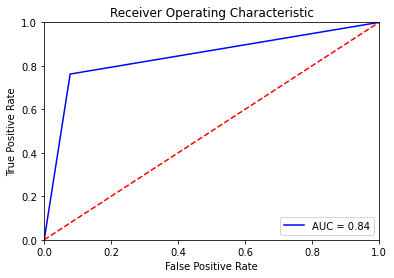

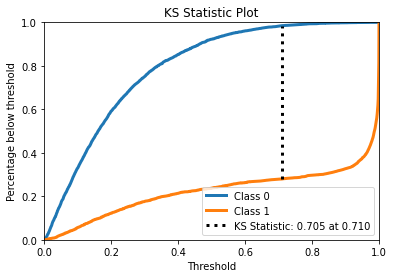

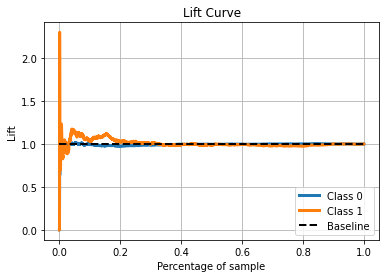

In [50]:
xgb = XGBClassifier(n_estimators=1471,
                    max_depth=10,
          gamma=5,
          min_child_weight=1.4,
          max_delta_step=9.6,
          subsample=0.83,
          colsample_bytree=0.9,
                    reg_alpha=0.4,reg_lambda=0.4
                    
)
train_model(xgb, 'XGBClassifier')

GradientBoosting

In [ ]:
def gbdt_cv(n_estimators, #调参
            min_samples_split, 
            max_features, 
            max_depth,
            learning_rate,
            subsample,
            alpha):
    res = cross_val_score( 
        GradientBoostingClassifier(n_estimators=int(n_estimators),
                                                        min_samples_split=int(min_samples_split),
                                                        max_features=min(max_features, 0.999), # float
                                                        max_depth=int(max_depth),
                                                        random_state=2
        ),
        X_train, y_train, scoring='roc_auc', cv=2
    ).mean()
    return res

gbdt_op = BayesianOptimization(
        gbdt_cv,
        {'n_estimators': (800, 1500),
        'min_samples_split': (20, 50),
        'max_features': (0.1, 0.9),
        'max_depth': (5, 15),
        'learning_rate':(0.01,0.05),
        'subsample':(0.3,0.7),
        'alpha':(0.5,1)}
    )

gbdt_op.maximize()

|   iter    |  target   |   alpha   | learni... | max_depth | max_fe... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.889    |  0.9162   |  0.0129   |  7.3      |  0.4187   |  45.81    |  1.038e+0 |  0.4002   |
|  2        |  0.8811   |  0.8375   |  0.0486   |  9.759    |  0.1223   |  27.81    |  1.113e+0 |  0.6422   |
|  3        |  0.8896   |  0.9472   |  0.04835  |  13.95    |  0.6955   |  28.31    |  1.29e+03 |  0.4099   |
|  4        |  0.8887   |  0.5996   |  0.02808  |  6.716    |  0.8108   |  25.63    |  997.2    |  0.3464   |
|  5        |  0.8818   |  0.6947   |  0.0223   |  5.861    |  0.1629   |  32.48    |  1.053e+0 |  0.5735   |
|  6        |  0.8897   |  0.7437   |  0.0171   |  12.67    |  0.8455   |  28.68    |  1.291e+0 |  0.6047   |
|  7        |  0.8886   |  0.7832   |  0.03388  |  6.221    |  0.6324   |  47.61    |  1.017e+0 |  0.3684   |
|  8      

In [ ]:
print(gbdt_op.max)

GradientBoostingClassifier
accuracy_score 0.8447394057476864
precision_score 91.50556531927357
recall_score 76.02823071306888
f1_score 83.05197394656388
roc_auc_score 0.8448011584398265
confusion_matrix
      0     1
0  3813   290
1   985  3124


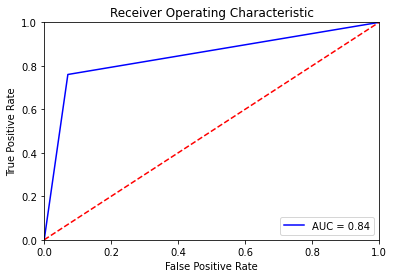

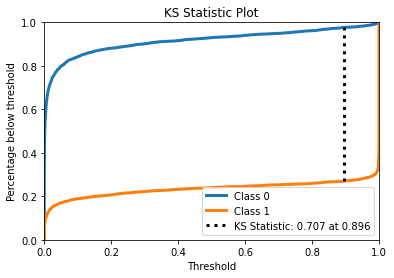

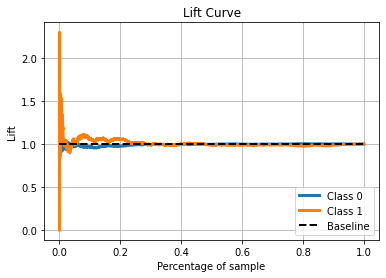

In [51]:
gbc = GradientBoostingClassifier(n_estimators=933, min_samples_split=20, max_depth=15,max_features=0.9)
train_model(gbc, 'GradientBoostingClassifier')

模型比较

In [52]:
y_head_lgbm = lgbm.predict(X_val)
y_head_cat = cat.predict(X_val)
y_head_xgb = xgb.predict(X_val)
y_head_gbc = gbc.predict(X_val)

In [53]:
cm_lgbm = confusion_matrix(y_val,y_head_lgbm)
cm_cat = confusion_matrix(y_val,y_head_cat)
cm_xgb = confusion_matrix(y_val,y_head_xgb)
cm_gbc = confusion_matrix(y_val,y_head_gbc)

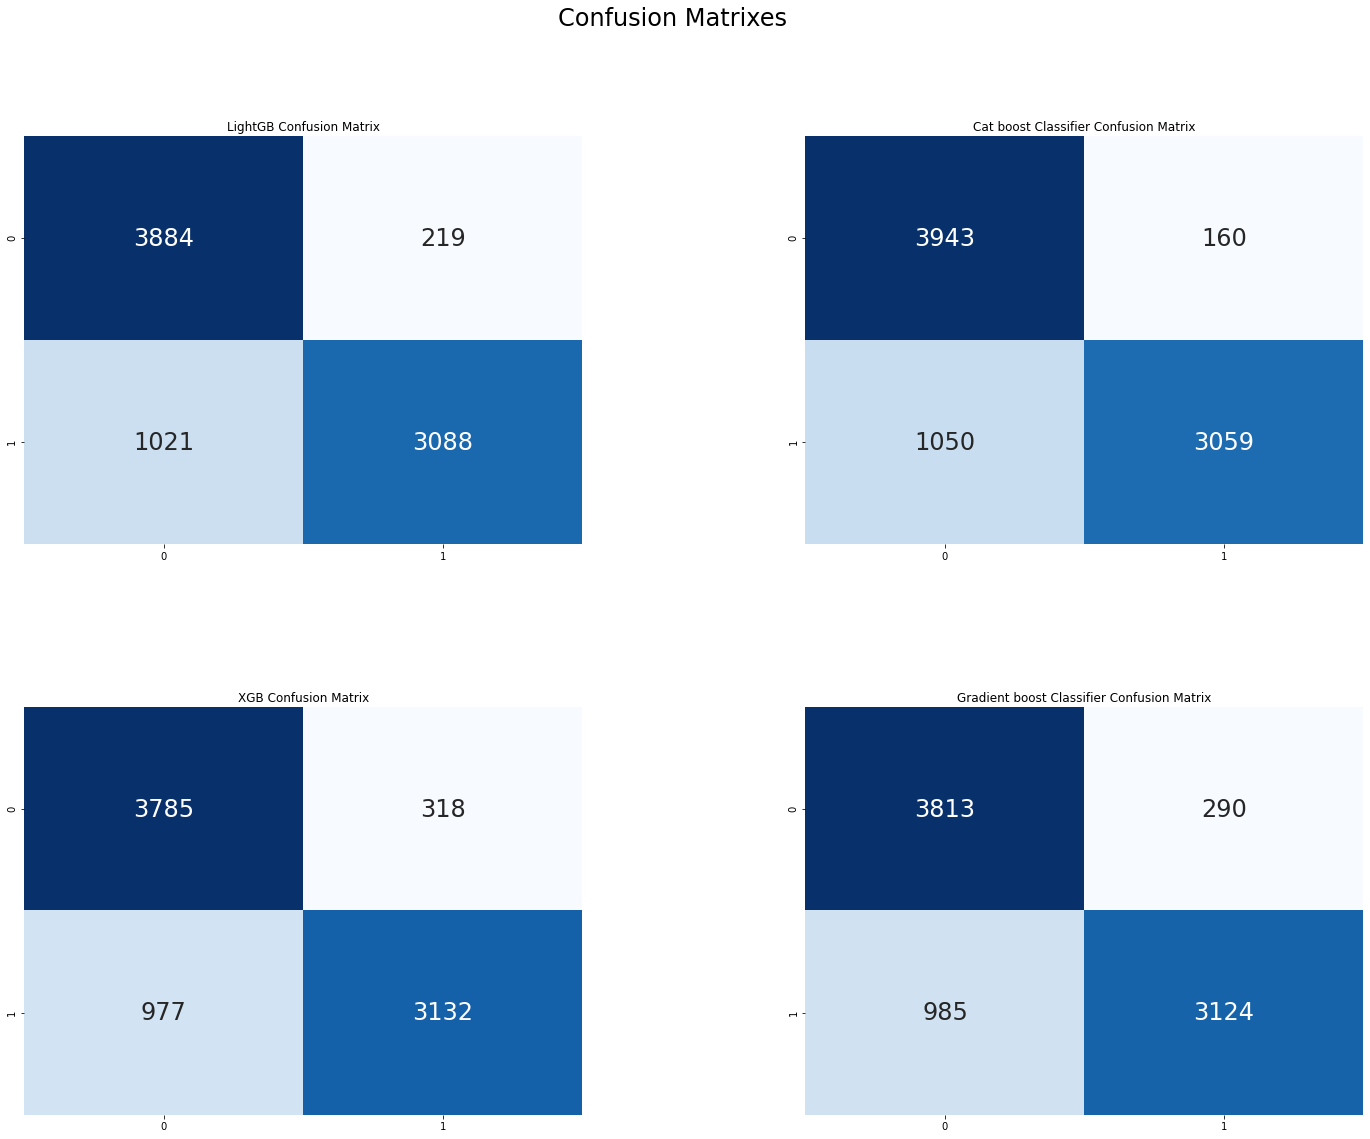

In [54]:
plt.figure(figsize=(24,18))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("LightGB Confusion Matrix")
sns.heatmap(cm_lgbm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Cat boost Classifier Confusion Matrix")
sns.heatmap(cm_cat,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("XGB Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("Gradient boost Classifier Confusion Matrix")
sns.heatmap(cm_gbc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


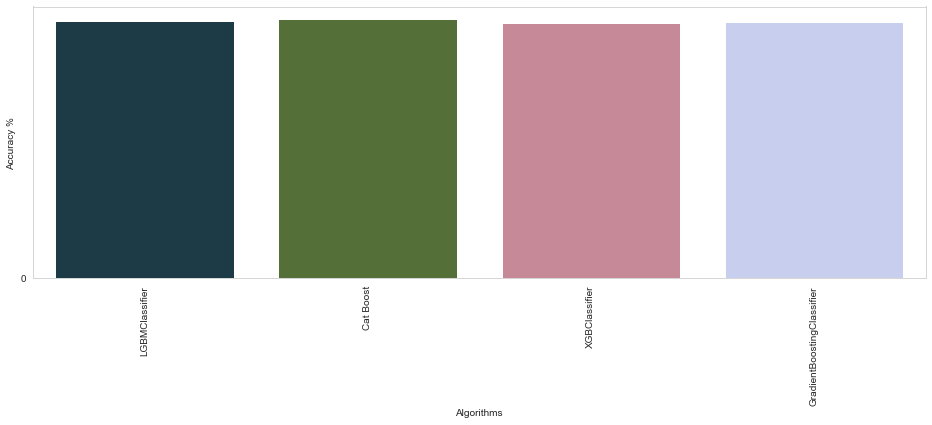

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="cubehelix")
plt.show()

特征影响程度

In [56]:
b=pd.DataFrame()
b['feature']=X.columns
b['importance_rate']=cat.feature_importances_
b=b.sort_values(by='importance_rate',axis=0,ascending=False)
b.head(10)

,feature,importance_rate
13,Age,32.80624
1,manufacturer_id,21.92781
22,Total.Overdue.Accts,6.26095
0,ltv,4.53302
18,No.of.Accts,4.38018
10,disbursed_amount,4.09977
21,Total.Active.Accts,3.94819
11,asset_cost,3.69247
14,PERFORM_CNS.SCORE,2.84981
16,Total.Instal.Amt,1.83790


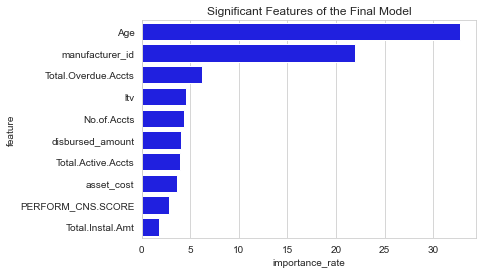

In [57]:
c=b.head(10)#影响程度最大的10个因素
ax=sns.barplot(y=c['feature'],x=c['importance_rate'],color='blue')
plt.title('Significant Features of the Final Model')
plt.show()

预测测试集

In [58]:
#catboost模型拟合最好
submission['loan_default'] = cat.predict(df1)

In [59]:
a=pd.DataFrame(cat.predict_proba(df1),columns=['p(y=0)',"p(y=1)"])
sub=submission.join(a)
sub.head()

,UniqueID,loan_default,p(y=0),p(y=1)
0,655269,0,0.75229,0.24771
1,723482,0,0.92586,0.07414
2,758529,0,0.87341,0.12659
3,763449,0,0.86221,0.13779
4,708663,0,0.68905,0.31095
